In [22]:
# weather_analyzer/main.py

import pandas as pd

# Load the weather dataset
df = pd.read_csv("weather.csv")
df.sample(5)

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
13464,1.80,2016-10-23,10,23,2016,Albany,ALB,"Albany, NY",New York,57,66,48,24,7.55
9666,1.04,2016-07-31,7,31,2016,Buffalo,BUF,"Buffalo, NY",New York,75,82,67,13,7.11
14470,0.00,2016-11-13,11,13,2016,Chattanooga,CHA,"Chattanooga, TN",Tennessee,55,68,41,15,3.87
613,0.38,2016-01-10,1,10,2016,Quillayute,UIL,"Quillayute, WA",Washington,41,49,32,7,4.31
1482,0.06,2016-01-31,1,31,2016,Toledo,TOL,"Toledo, OH",Ohio,33,43,27,23,10.71


In [23]:
# Rename columns to simpler names
df.rename(columns={
    'Data.Precipitation': 'Precipitation',
    'Date.Full': 'Date',
    'Date.Month': 'Month',
    'Date.Week of': 'Week',
    'Date.Year': 'Year',
    'Station.City': 'City',
    'Station.Code': 'Code',
    'Station.Location': 'Location',
    'Station.State': 'State',
    'Data.Temperature.Avg Temp': 'AvgTemp',
    'Data.Temperature.Max Temp': 'MaxTemp',
    'Data.Temperature.Min Temp': 'MinTemp',
    'Data.Wind.Direction': 'WindDirection',
    'Data.Wind.Speed': 'WindSpeed'
}, inplace=True)

# Optional: print the cleaned column names
print("\n✅ Renamed Columns:")
print(df.columns.tolist())


✅ Renamed Columns:
['Precipitation', 'Date', 'Month', 'Week', 'Year', 'City', 'Code', 'Location', 'State', 'AvgTemp', 'MaxTemp', 'MinTemp', 'WindDirection', 'WindSpeed']


In [24]:
# Show the first 5 rows
print("\n🔹 First 5 Rows:")
print(df.sample(5))


🔹 First 5 Rows:
       Precipitation        Date  Month  Week  Year     City Code  \
14980           1.03  2016-11-27     11    27  2016   Alpena  APN   
13632           0.64  2016-10-30     10    30  2016   Fresno  FAT   
187             0.00  2016-01-03      1     3  2016  Mercury  DRA   
8570            0.00  2016-07-10      7    10  2016   Bishop  BIH   
5066            2.67  2016-04-24      4    24  2016   Kodiak  ADQ   

          Location       State  AvgTemp  MaxTemp  MinTemp  WindDirection  \
14980   Alpena, MI    Michigan       33       39       26             23   
13632   Fresno, CA  California       66       76       56             11   
187    Mercury, NV      Nevada       39       47       30              9   
8570    Bishop, CA  California       77       99       55             26   
5066    Kodiak, AK      Alaska       43       47       39              7   

       WindSpeed  
14980       5.47  
13632       3.22  
187         7.96  
8570        4.88  
5066       14.50

In [25]:
# Basic info: rows, columns, data types
print("\n🔹 Dataset Info:")
print(df.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16743 entries, 0 to 16742
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precipitation  16743 non-null  float64
 1   Date           16743 non-null  object 
 2   Month          16743 non-null  int64  
 3   Week           16743 non-null  int64  
 4   Year           16743 non-null  int64  
 5   City           16743 non-null  object 
 6   Code           16743 non-null  object 
 7   Location       16743 non-null  object 
 8   State          16743 non-null  object 
 9   AvgTemp        16743 non-null  int64  
 10  MaxTemp        16743 non-null  int64  
 11  MinTemp        16743 non-null  int64  
 12  WindDirection  16743 non-null  int64  
 13  WindSpeed      16743 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 1.8+ MB
None


In [26]:
# Basic stats (for numeric columns)
print("\n🔹 Statistical Summary:")
print(df.describe())


🔹 Statistical Summary:
       Precipitation         Month          Week          Year       AvgTemp  \
count   16743.000000  16743.000000  16743.000000  16743.000000  16743.000000   
mean        0.579090      6.343128     15.650242   2016.018933     56.089112   
std         0.988057      3.490723      8.923425      0.136294     18.798295   
min         0.000000      1.000000      1.000000   2016.000000    -27.000000   
25%         0.000000      3.000000      8.000000   2016.000000     44.000000   
50%         0.190000      6.000000     16.000000   2016.000000     58.000000   
75%         0.750000      9.000000     24.000000   2016.000000     71.000000   
max        20.890000     12.000000     31.000000   2017.000000    100.000000   

            MaxTemp       MinTemp  WindDirection     WindSpeed  
count  16743.000000  16743.000000   16743.000000  16743.000000  
mean      66.042406     45.642716      18.791316      6.329820  
std       19.787954     18.559263       6.461527      3.4947

🔥 Analyze Average Temperature per State

In [27]:
# Group by state and calculate average temperature
state_avg_temp = df.groupby('State')['AvgTemp'].mean().sort_values(ascending=False)

# Print the top 10 hottest states
print("\n🌡️ Top 10 Hottest States (Avg Temp):")
print(state_avg_temp.head(3))

# Print the bottom 10 coldest states
print("\n❄️ Top 10 Coldest States (Avg Temp):")
print(state_avg_temp.tail(3))



🌡️ Top 10 Hottest States (Avg Temp):
State
Puerto Rico    81.358491
Hawaii         76.384906
Florida        73.926101
Name: AvgTemp, dtype: float64

❄️ Top 10 Coldest States (Avg Temp):
State
North Dakota    45.166038
Minnesota       44.675472
Alaska          41.157650
Name: AvgTemp, dtype: float64


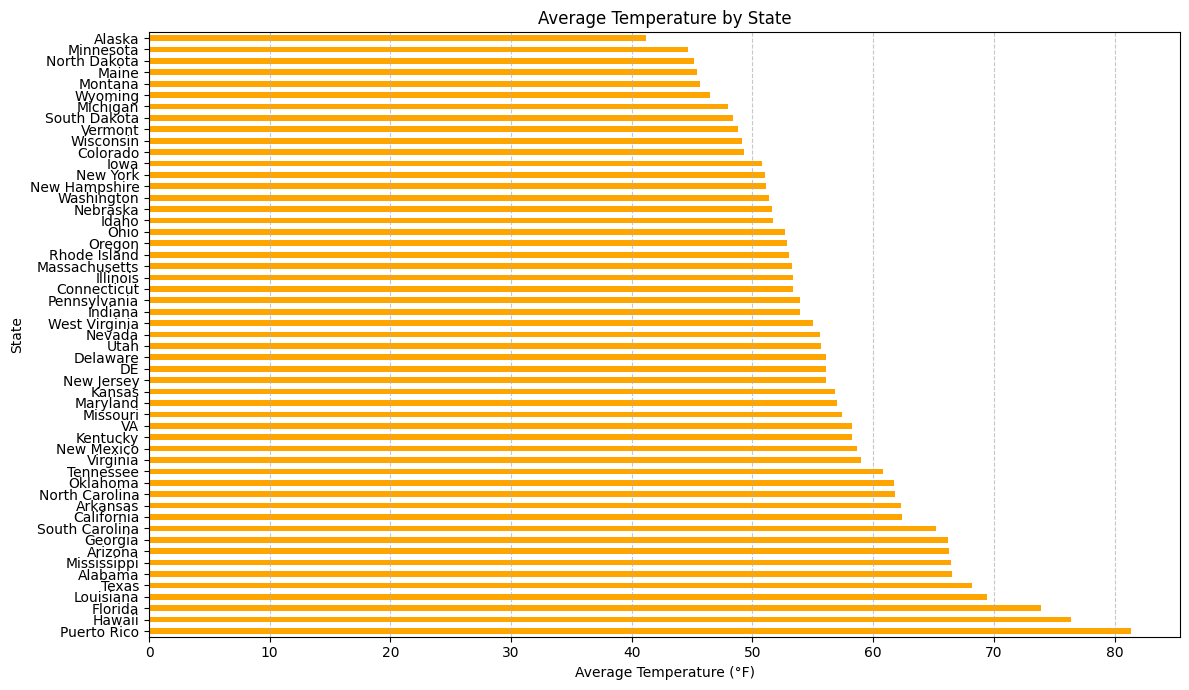

In [28]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 7))
state_avg_temp.plot(kind='barh', color='orange')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('State')
plt.title('Average Temperature by State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and show
# plt.savefig("state_avg_temp.png")
plt.show()


Monthly Rainfall Trends

<Figure size 1400x700 with 0 Axes>

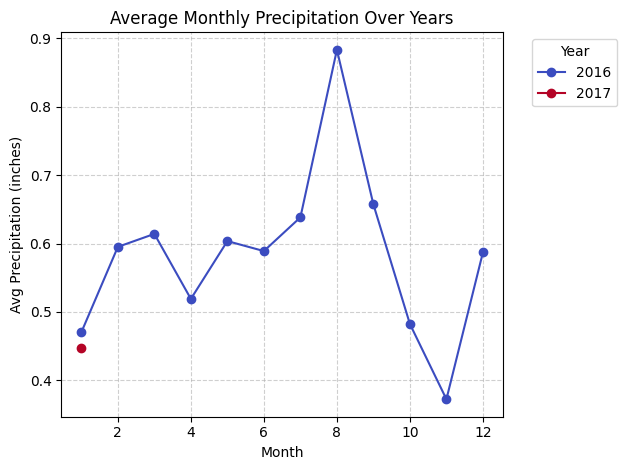

In [29]:
# Create a pivot table for average monthly precipitation by year
rainfall_pivot = df.pivot_table(
    index='Month', 
    columns='Year', 
    values='Precipitation', 
    aggfunc='mean'
)

# Plotting
plt.figure(figsize=(14, 7))
rainfall_pivot.plot(marker='o', colormap='coolwarm')
plt.title('Average Monthly Precipitation Over Years')
plt.xlabel('Month')
plt.ylabel('Avg Precipitation (inches)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and show
# plt.savefig("monthly_rainfall_trend.png")
plt.show()


Checking why 2017 is not present here

In [30]:
df["Year"].value_counts()
# print(df[df['Year'] == 2017])


Year
2016    16426
2017      317
Name: count, dtype: int64

In [21]:
print(df[df['Year'] == 2017]['Precipitation'].isna().sum())
print(df[df['Year'] == 2017]['Month'].value_counts())


0
Month
1    317
Name: count, dtype: int64


Wind Speed Distribution
📊 Histogram to understand wind speed variation

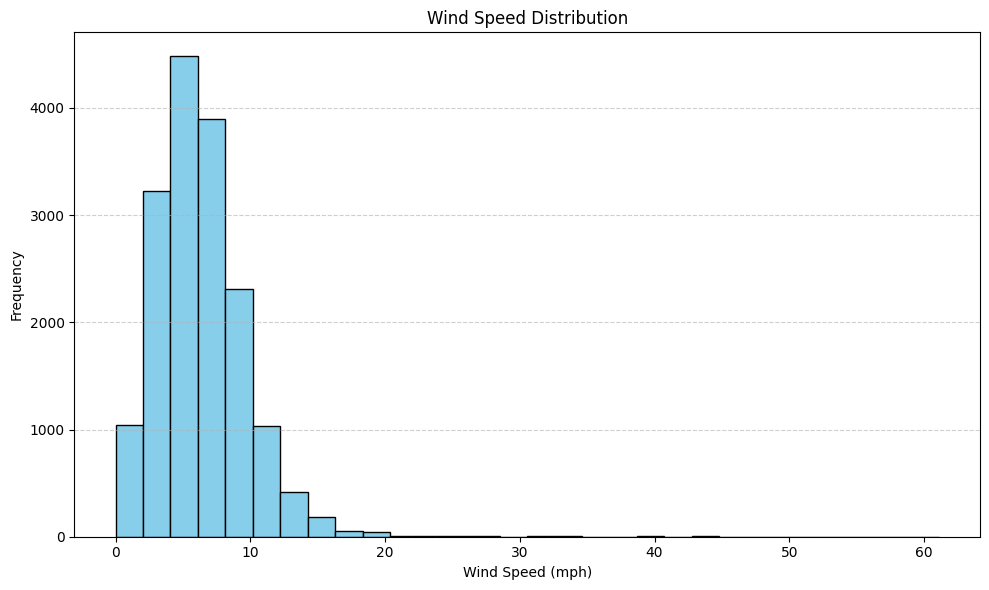

In [32]:
# Plot wind speed distribution
plt.figure(figsize=(10, 6))
plt.hist(df['WindSpeed'], bins=30, color='skyblue', edgecolor='black')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save and show
plt.savefig("wind_speed_distribution.png")
plt.show()


 Wind Speed by Direction
🚩 Bar chart to show avg wind speed by direction

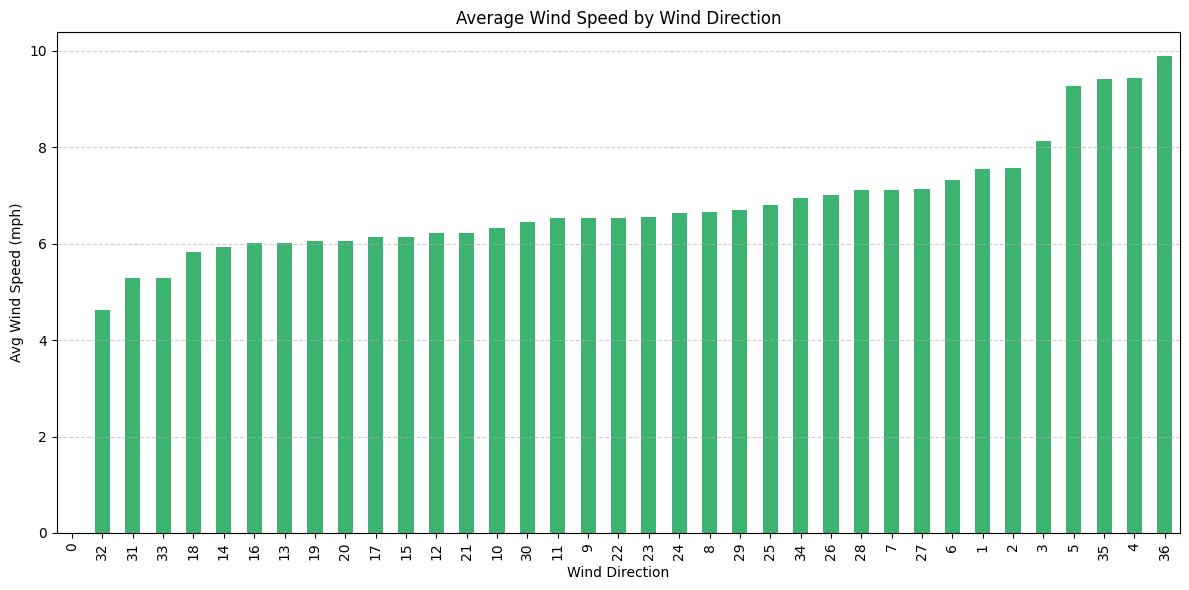

In [33]:
# Average wind speed per wind direction
wind_by_dir = df.groupby('WindDirection')['WindSpeed'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 6))
wind_by_dir.plot(kind='bar', color='mediumseagreen')
plt.title('Average Wind Speed by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Avg Wind Speed (mph)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save and show
# plt.savefig("wind_speed_by_direction.png")
plt.show()


Task 4b (Bonus): City-wise Weather Score
🎯 Create a normalized weather score per city (lower is better)

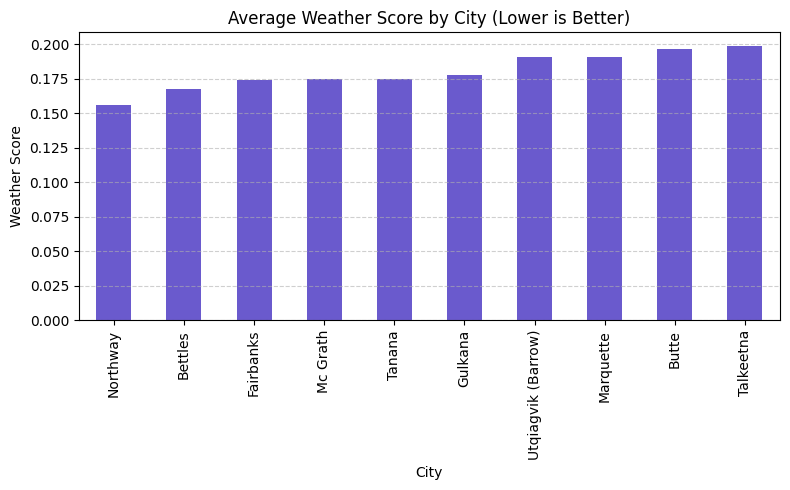

In [42]:
# Step 1: Normalize the main features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
weather_features = df[['AvgTemp', 'Precipitation', 'WindSpeed']]
normalized = scaler.fit_transform(weather_features)
df[['Temp_Norm', 'Rain_Norm', 'Wind_Norm']] = normalized

# Step 2: Average weather score per city (equal weights)
df['WeatherScore'] = df[['Temp_Norm', 'Rain_Norm', 'Wind_Norm']].mean(axis=1)
city_scores = df.groupby('City')['WeatherScore'].mean().sort_values()

# Step 3: Plot
plt.figure(figsize=(8, 5))
city_scores.head(10).plot(kind='bar', color='slateblue')
plt.title('Average Weather Score by City (Lower is Better)')
plt.ylabel('Weather Score')
plt.xlabel('City')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# plt.savefig("weather_score_by_city.png")
plt.show()


In [35]:
df.columns

Index(['Precipitation', 'Date', 'Month', 'Week', 'Year', 'City', 'Code',
       'Location', 'State', 'AvgTemp', 'MaxTemp', 'MinTemp', 'WindDirection',
       'WindSpeed', 'Temp_Norm', 'Rain_Norm', 'Wind_Norm', 'WeatherScore'],
      dtype='object')

🔥 Additional Important Data Analyses You Can Do
1. Extreme Weather Events Detection

    Identify days or cities with extreme temperatures or rainfall (top 1-5% quantiles)

    Useful for risk assessment or warnings

In [43]:
# Identify extreme high temperatures (95th percentile)
high_temp_threshold = df['MaxTemp'].quantile(0.95)
extreme_heat = df[df['MaxTemp'] >= high_temp_threshold]

print(f"Number of extreme heat days: {len(extreme_heat)}")
print(extreme_heat[['Date', 'City', 'MaxTemp']].head())


Number of extreme heat days: 912
            Date            City  MaxTemp
6035  2016-05-15         Phoenix       95
6036  2016-05-15          Tucson       94
6912  2016-05-29         Midland       95
6984  2016-06-05  Douglas Bisbee       98
6985  2016-06-05         Kingman      103


2. Seasonal Temperature Trends by State

    Group by month and state to see seasonal patterns

    Plot heatmaps or line plots to visualize seasonal changes

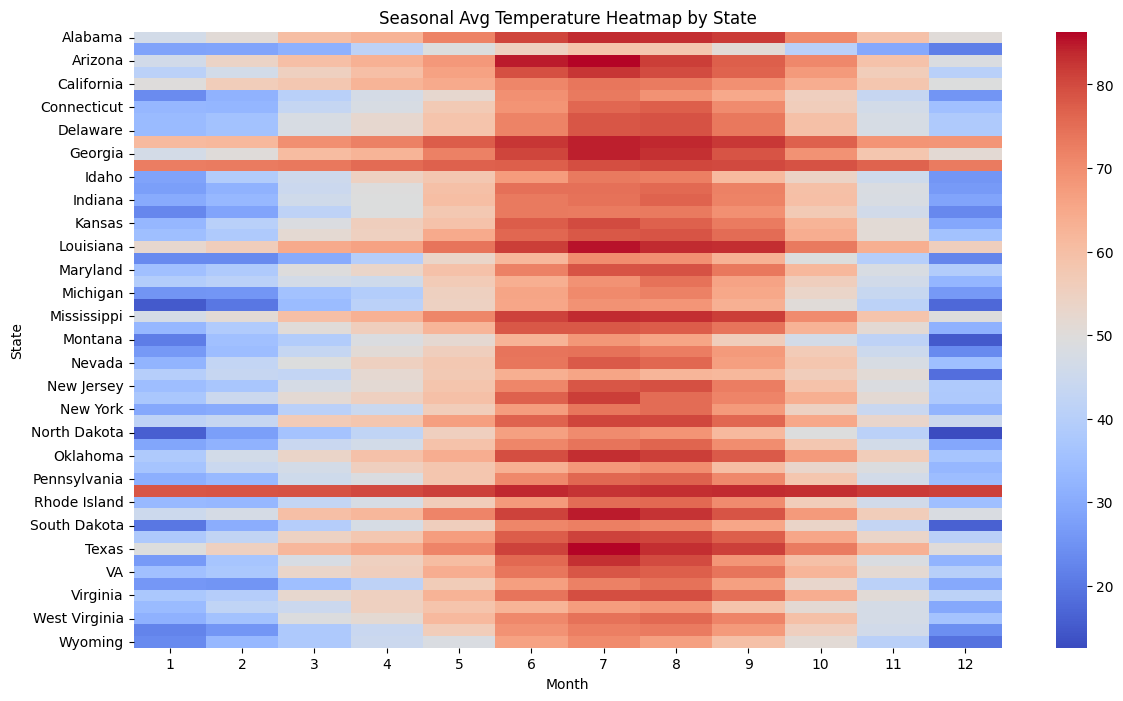

In [44]:
import seaborn as sns

# Avg temperature by month and state
seasonal_temp = df.groupby(['State', 'Month'])['AvgTemp'].mean().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(seasonal_temp, cmap="coolwarm", annot=False)
plt.title('Seasonal Avg Temperature Heatmap by State')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()


Correlation matrix:
                AvgTemp   MaxTemp   MinTemp  Precipitation  WindSpeed
AvgTemp        1.000000  0.980763  0.978049       0.121750  -0.162330
MaxTemp        0.980763  1.000000  0.921386       0.069360  -0.195812
MinTemp        0.978049  0.921386  1.000000       0.172367  -0.119266
Precipitation  0.121750  0.069360  0.172367       1.000000  -0.003102
WindSpeed     -0.162330 -0.195812 -0.119266      -0.003102   1.000000


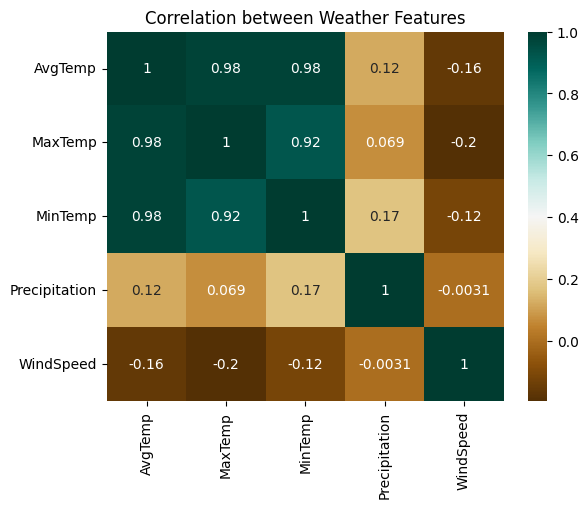

In [45]:
corr_matrix = df[['AvgTemp', 'MaxTemp', 'MinTemp', 'Precipitation', 'WindSpeed']].corr()
print("Correlation matrix:")
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap="BrBG")
plt.title("Correlation between Weather Features")
plt.show()
